In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
class LinearRegression:
    def __init__(self, has_intercept=True) -> None:
        self.has_intercept = has_intercept
    
    def fit_intercept(self, X: np.ndarray) -> np.ndarray:
        return np.hstack((X, np.ones((X.shape[0], 1)))) if self.has_intercept else X
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> np.ndarray:
        X = self.fit_intercept(X)

        self.weights = np.linalg.inv(X.T @ X) @ X.T @ Y

        return self.weights
    
    def predict(self, X: np.ndarray) -> np.ndarray | None:
        X = self.fit_intercept(X)

        self.y_pred = None

        try:
            self.y_pred = X @ self.weights
        except AttributeError:
            print("Please, fit train X set first (weights aren't calculated yet)")
        
        return self.y_pred

In [51]:
f = lambda x: 5 * x + 6

X = np.linspace(-5, 5, 50)
y = f(X) + np.random.randn(50) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

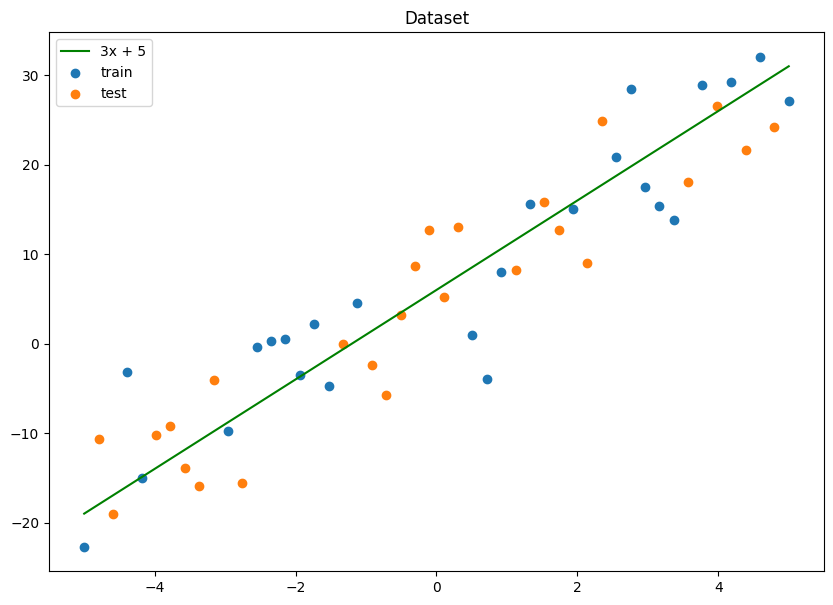

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(X, f(X), label="3x + 5", c="g")
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")

plt.title("Dataset")
plt.legend()
plt.show()

In [54]:
regressor = LinearRegression()

weights = regressor.fit(X_train[:, np.newaxis], y_train)

print(f"y = {weights[0]:.2f}x + {weights[1]:.2f}")

y = 4.50x + 6.47


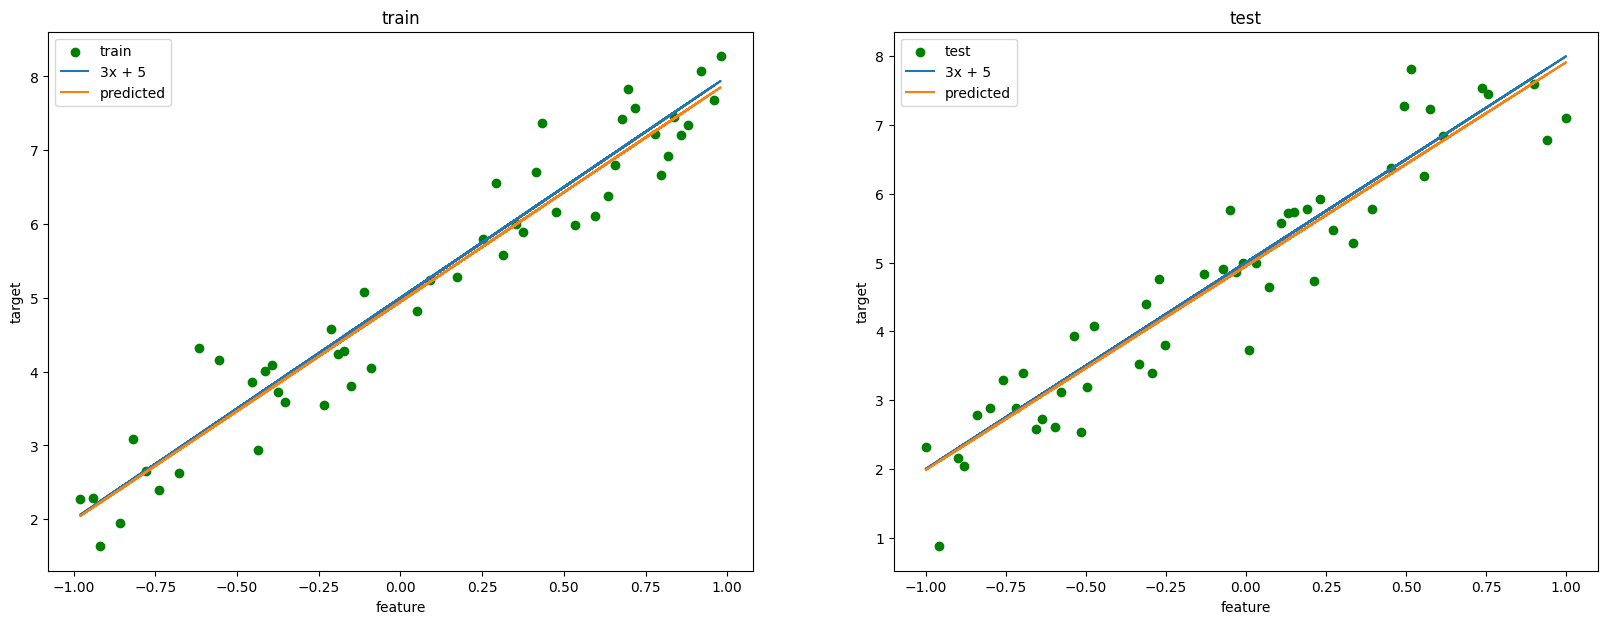

In [8]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)

plt.scatter(X_train, y_train, label="train", c="g")
plt.plot(X_train, f(X_train), label="3x + 5")
plt.plot(X_train, regressor.predict(X_train[:, np.newaxis]), label="predicted")

plt.ylabel("target")
plt.xlabel("feature")
plt.title("train")
plt.legend()


plt.subplot(1, 2, 2)

plt.scatter(X_test, y_test, label="test", c="g")
plt.plot(X_test, f(X_test), label="3x + 5")
plt.plot(X_test, regressor.predict(X_test[:, np.newaxis]), label="predicted")

plt.ylabel("target")
plt.xlabel("feature")
plt.title("test")
plt.legend()

plt.show()


In [57]:
print(f"Train MSE: {mean_squared_error(y_train, regressor.predict(X_train[:, np.newaxis]))}")
print(f"Test MSE: {mean_squared_error(y_test, regressor.predict(X_test[:, np.newaxis]))}")

Train MSE: 31.581502662860203
Test MSE: 24.350776113971175


In [78]:
class GradientLinearRegression(LinearRegression):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
    
    def fit(self, X: np.ndarray, Y: np.ndarray, lr=0.01, max_iter=100, n_sample=0) -> np.ndarray:
        self.weights = np.random.randn(
            X.shape[1] + 1 if self.has_intercept else X.shape[1]
        )
        
        X_train = np.hstack((X, np.ones((X.shape[0], 1)))) if self.has_intercept else X

        self.losses = []

        while max_iter:
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, Y))
            grad = self._gradient(X_train, Y, y_pred, n_sample)
            self.weights -= lr * grad
            max_iter -= 1
        
        return self.weights

    def _gradient(self, X: np.ndarray, Y: np.ndarray, y_pred: np.ndarray, n_sample=0) -> np.ndarray:
        if n_sample:
            inds = np.random.choice(np.arange(X.shape[0]), size=n_sample, replace=False)
            grad = (2 * (y_pred[inds] - Y[inds])[:, np.newaxis] * X[inds]).mean(axis=0)
        else:
            grad = (2 * (y_pred - Y)[:, np.newaxis] * X).mean(axis=0)
        
        return grad

In [81]:
regressor = GradientLinearRegression(has_intercept=True)

weights = regressor.fit(X_train[:, np.newaxis], y_train)

print(f"y = {weights[0]:.2f}x + {weights[1]:.2f}")

y = 4.55x + 5.35


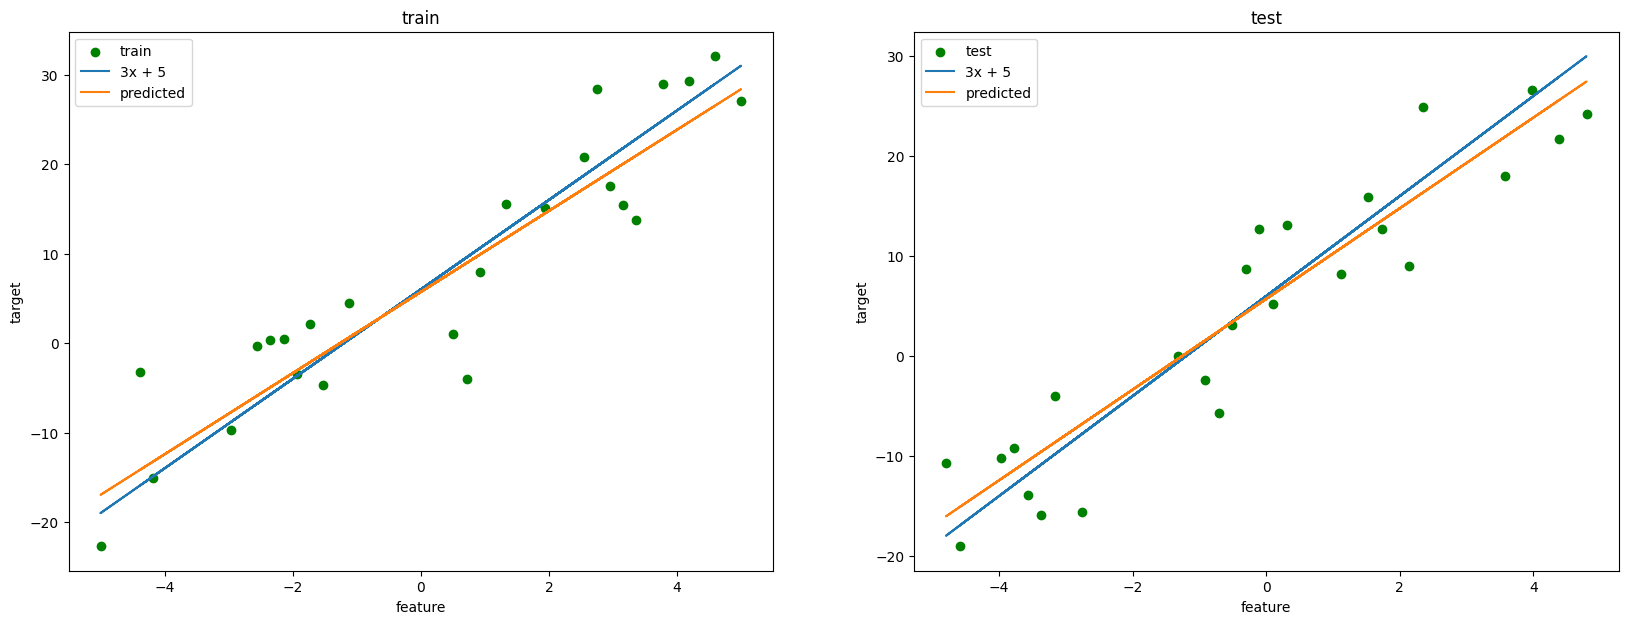

In [75]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)

plt.scatter(X_train, y_train, label="train", c="g")
plt.plot(X_train, f(X_train), label="3x + 5")
plt.plot(X_train, regressor.predict(X_train[:, np.newaxis]), label="predicted")

plt.ylabel("target")
plt.xlabel("feature")
plt.title("train")
plt.legend()


plt.subplot(1, 2, 2)

plt.scatter(X_test, y_test, label="test", c="g")
plt.plot(X_test, f(X_test), label="3x + 5")
plt.plot(X_test, regressor.predict(X_test[:, np.newaxis]), label="predicted")

plt.ylabel("target")
plt.xlabel("feature")
plt.title("test")
plt.legend()

plt.show()

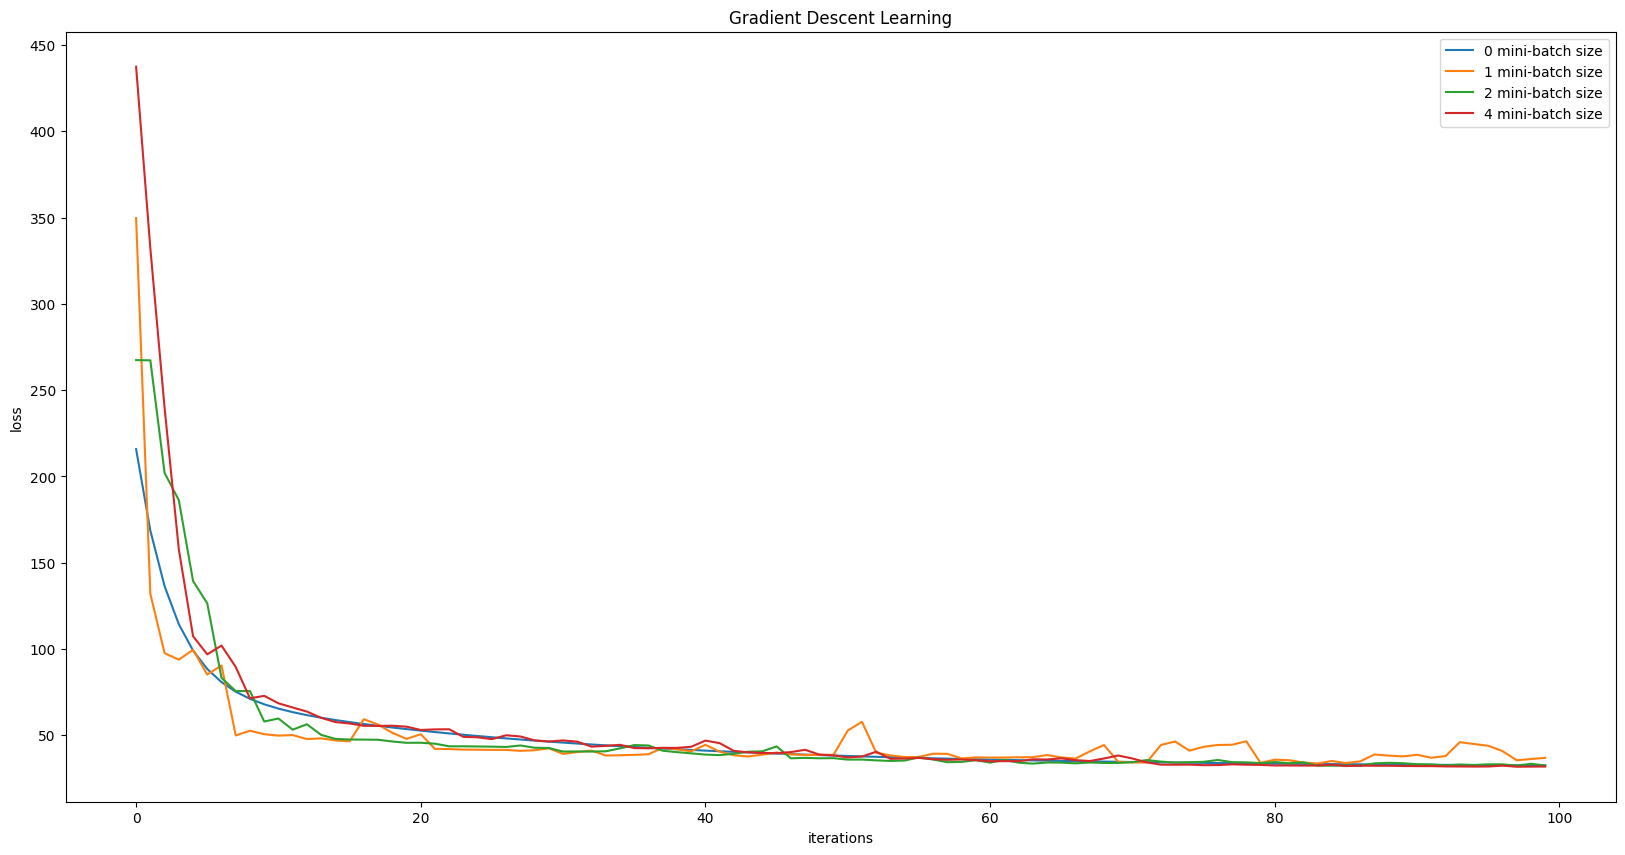

In [90]:
plt.figure(figsize=(20, 10))

for n_sample in [0, 1, 2, 4]:
    regressor = GradientLinearRegression(has_intercept=True)

    weights = regressor.fit(X_train[:, np.newaxis], y_train, n_sample=n_sample)

    plt.plot(regressor.losses, label=f"{n_sample} mini-batch size")

plt.title("Gradient Descent Learning")
plt.ylabel("loss")
plt.xlabel("iterations")

plt.legend()

plt.show()